In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import shapely
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv(r'C:\Users\MadiL\CS110 CodeBase\cleaned_data_lat_long.csv')

# Making the white df
df = df[df['StratificationID1'] == 'WHT']
df = df[df['YearStart'] == df['YearEnd']]
df = df[df['DataValueType'] == 'Crude Prevalence']
df = df.dropna(subset=['DataValue'])
df.to_csv(r'C:\Users\MadiL\CS110 CodeBase\Demographics\white_crude_prevalence_df.csv')

# Making the black df
df = pd.read_csv(r'C:\Users\MadiL\CS110 CodeBase\\cleaned_data_lat_long.csv')
df = df[df['StratificationID1'] == 'BLK']
df = df[df['YearStart'] == df['YearEnd']]
df = df[df['DataValueType'] == 'Crude Prevalence']
df = df.dropna(subset=['DataValue'])
df.to_csv(r'C:\Users\MadiL\CS110 CodeBase\Demographics\black_crude_prevalence_df.csv')

# Making the hispanic df
df = pd.read_csv(r'C:\Users\MadiL\CS110 CodeBase\cleaned_data_lat_long.csv')
df = df[df['StratificationID1'] == 'HIS']
df = df[df['YearStart'] == df['YearEnd']]
df = df[df['DataValueType'] == 'Crude Prevalence']
df = df.dropna(subset=['DataValue'])
df.to_csv(r'C:\Users\MadiL\CS110 CodeBase\Demographics\hispanic_crude_prevalence_df.csv')

# Making the asian df
df = pd.read_csv(r'C:\Users\MadiL\CS110 CodeBase\cleaned_data_lat_long.csv')
df = df[df['StratificationID1'] == 'API']
df = df[df['YearStart'] == df['YearEnd']]
df = df[df['DataValueType'] == 'Crude Prevalence']
df = df.dropna(subset=['DataValue'])
df.to_csv(r'C:\Users\MadiL\CS110 CodeBase\Demographics\asian_crude_prevalence_df.csv')\

# Making the american indian / alaskan native df
df = pd.read_csv(r'C:\Users\MadiL\CS110 CodeBase\cleaned_data_lat_long.csv')
df = df[df['StratificationID1'] == 'AIAN']
df = df[df['YearStart'] == df['YearEnd']]
df = df[df['DataValueType'] == 'Crude Prevalence']
df = df.dropna(subset=['DataValue'])
df.to_csv(r'C:\Users\MadiL\CS110 CodeBase\Demographics\native_crude_prevalence_df.csv')






C:\Users\MadiL\AppData\Local\Temp\ipykernel_21224\3996510547.py:17: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\MadiL\CS110 CodeBase\cleaned_data_lat_long.csv')
C:\Users\MadiL\AppData\Local\Temp\ipykernel_21224\3996510547.py:27: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\MadiL\CS110 CodeBase\\cleaned_data_lat_long.csv')
C:\Users\MadiL\AppData\Local\Temp\ipykernel_21224\3996510547.py:35: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\MadiL\CS110 CodeBase\cleaned_data_lat_long.csv')
C:\Users\MadiL\AppData\Local\Temp\ipykernel_21224\3996510547.py:43: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\MadiL\CS110 CodeBase\cleaned_data_lat_long.csv')
C:\User

## White

  LocationDesc  YearStart  YearEnd  DataValue_x  DataValue_y
0      Alabama       2019     2019         32.6         13.3
1      Arizona       2019     2019         28.5          9.5
2       Alaska       2019     2019         28.6          8.5
3         Guam       2019     2019         25.5          6.6
4  Connecticut       2019     2019         26.5          8.4


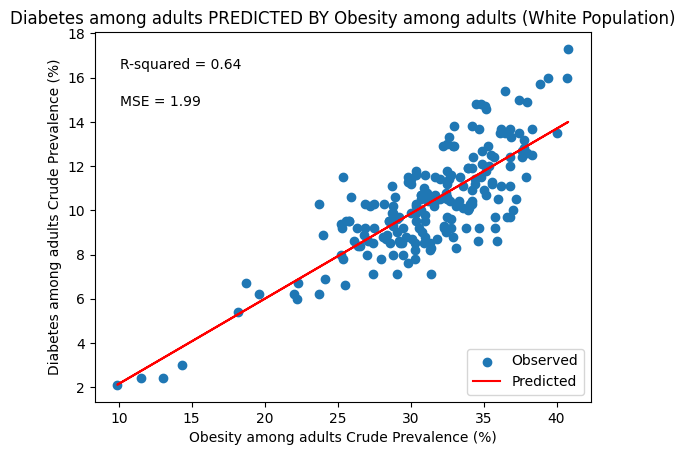

In [8]:
df_white = pd.read_csv(r'C:\Users\MadiL\CS110 CodeBase\Demographics\white_crude_prevalence_df.csv')

x_question = 'Obesity among adults'
y_question = 'Diabetes among adults'

x_df_white = df_white[(df_white['Question'] == f'{x_question}')] 
y_df_white = df_white[(df_white['Question'] == f'{y_question}')]

# Merge on 'LocationDesc'
merged_df_white = pd.merge(
    x_df_white[['LocationDesc', 'YearStart', 'YearEnd', 'DataValue']],
    y_df_white[['LocationDesc', 'YearStart', 'YearEnd', 'DataValue']],
    on=['LocationDesc', 'YearStart', 'YearEnd'],
    suffixes=('_x', '_y')
)
merged_df_white = merged_df_white.dropna(subset=['DataValue_x', 'DataValue_y'])

print(merged_df_white.head())

X_white = merged_df_white[['DataValue_x']]
y_white = merged_df_white['DataValue_y']

# Standardize the data
#X_white = (X_white - X_white.mean()) / X_white.std()
#y_white = (y_white - y_white.mean()) / y_white.std()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_white, y_white, test_size=0.2, random_state=42)

# Train a model
model = LinearRegression()
model.fit(X_white, y_white)

# Make predictions
predictions = model.predict(X_white)

# Plot the predictions
plt.scatter(X_white, y_white, label='Observed')
plt.plot(X_white, predictions, label='Predicted', color='red')
plt.xlabel(f'{x_question} Crude Prevalence (%)')
plt.ylabel(f'{y_question} Crude Prevalence (%)')
plt.title(f'{y_question} PREDICTED BY {x_question} (White Population)')
plt.legend()


# Evaluate the model
mse_white = mean_squared_error(y_white, predictions)
plt.text(0.05, 0.8, f'MSE = {mse_white:.2f}', transform=plt.gca().transAxes)
r2_white = r2_score(y_white, predictions)
plt.text(0.05, 0.9, f'R-squared = {r2_white:.2f}', transform=plt.gca().transAxes)
plt.show()


## Black

  LocationDesc  YearStart  YearEnd  DataValue_x  DataValue_y
0      Alabama       2019     2019         46.6         17.3
1      Arizona       2019     2019         37.6         17.8
2   California       2019     2019         32.9         14.4
3  Connecticut       2019     2019         44.0         15.5
4     Colorado       2019     2019         27.5          9.7


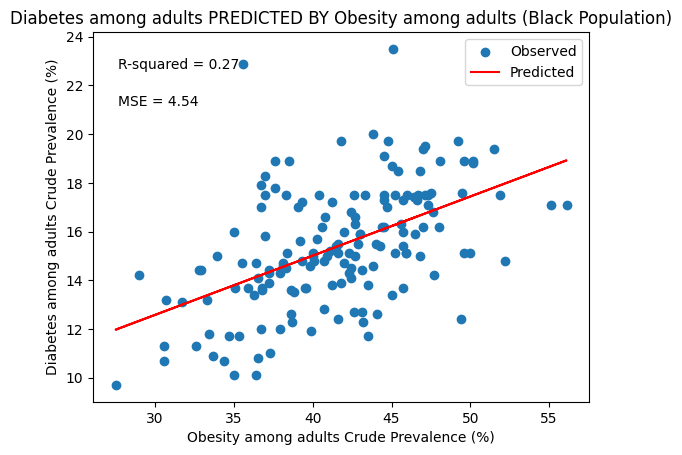

In [9]:
df_black = pd.read_csv(r'C:\Users\MadiL\CS110 CodeBase\Demographics\black_crude_prevalence_df.csv')

x_question = 'Obesity among adults'
y_question = 'Diabetes among adults'

x_df_black = df_black[(df_black['Question'] == f'{x_question}')] 
y_df_black = df_black[(df_black['Question'] == f'{y_question}')]

# Merge on 'LocationDesc'
merged_df_black = pd.merge(
    x_df_black[['LocationDesc', 'YearStart', 'YearEnd', 'DataValue']],
    y_df_black[['LocationDesc', 'YearStart', 'YearEnd', 'DataValue']],
    on=['LocationDesc', 'YearStart', 'YearEnd'],
    suffixes=('_x', '_y')
)
merged_df_black = merged_df_black.dropna(subset=['DataValue_x', 'DataValue_y'])

print(merged_df_black.head())

X_black = merged_df_black[['DataValue_x']]
y_black = merged_df_black['DataValue_y']

# Standardize the data
#X_black = (X_black - X_black.mean()) / X_black.std()
#y_black = (y_black - y_black.mean()) / y_black.std()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_black, y_black, test_size=0.2, random_state=42)

# Train a model
model = LinearRegression()
model.fit(X_black, y_black)

# Make predictions
predictions = model.predict(X_black)

# Plot the predictions
plt.scatter(X_black, y_black, label='Observed')
plt.plot(X_black, predictions, label='Predicted', color='red')
plt.xlabel(f'{x_question} Crude Prevalence (%)')
plt.ylabel(f'{y_question} Crude Prevalence (%)')
plt.title(f'{y_question} PREDICTED BY {x_question} (Black Population)')
plt.legend()


# Evaluate the model
mse_black = mean_squared_error(y_black, predictions)
plt.text(0.05, 0.8, f'MSE = {mse_black:.2f}', transform=plt.gca().transAxes)
r2_black = r2_score(y_black, predictions)
plt.text(0.05, 0.9, f'R-squared = {r2_black:.2f}', transform=plt.gca().transAxes)
plt.show()


## Native

  LocationDesc  YearStart  YearEnd  DataValue_x  DataValue_y
0      Alabama       2019     2019         30.9         15.3
1      Arizona       2019     2019         57.9         21.2
2      Indiana       2019     2019         33.1         22.7
3       Kansas       2019     2019         37.9         11.5
4     Michigan       2019     2019         38.2         17.6
Shape of X: (70, 1)
Shape of y: (70,)


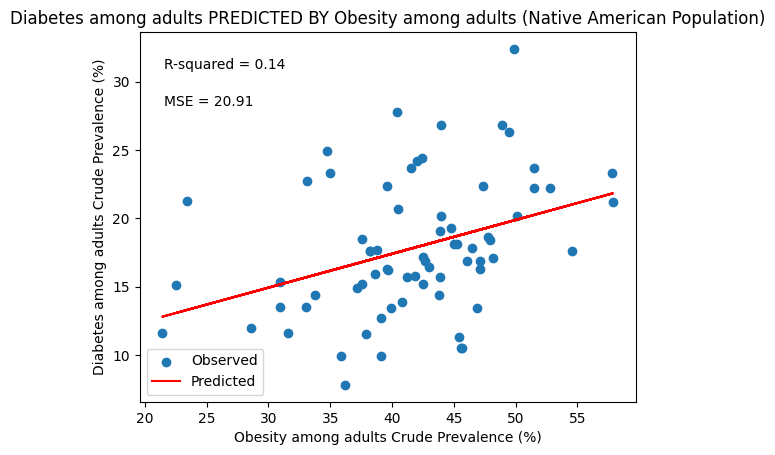

In [10]:
df_native = pd.read_csv(r'C:\Users\MadiL\CS110 CodeBase\Demographics\native_crude_prevalence_df.csv')

x_question = 'Obesity among adults'
y_question = 'Diabetes among adults'

x_df_native = df_native[(df_native['Question'] == f'{x_question}')] 
y_df_native = df_native[(df_native['Question'] == f'{y_question}')]




# Merge on 'LocationDesc'
merged_df_native = pd.merge(
    x_df_native[['LocationDesc', 'YearStart', 'YearEnd', 'DataValue']],
    y_df_native[['LocationDesc', 'YearStart', 'YearEnd', 'DataValue']],
    on=['LocationDesc', 'YearStart', 'YearEnd'],
    suffixes=('_x', '_y')
)
merged_df_native = merged_df_native.dropna(subset=['DataValue_x', 'DataValue_y'])

print(merged_df_native.head())

X_native = merged_df_native[['DataValue_x']]
y_native = merged_df_native['DataValue_y']

# Standardize the data
#X_native = (X_native - X_native.mean()) / X_native.std()
#y_native = (y_native - y_native.mean()) / y_native.std()

print(f"Shape of X: {X_native.shape}")
print(f"Shape of y: {y_native.shape}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_native, y_native, test_size=0.2, random_state=42)

# Train a model
model = LinearRegression()
model.fit(X_native, y_native)

# Make predictions
predictions = model.predict(X_native)

# Plot the predictions
plt.scatter(X_native, y_native, label='Observed')
plt.plot(X_native, predictions, label='Predicted', color='red')
plt.xlabel(f'{x_question} Crude Prevalence (%)')
plt.ylabel(f'{y_question} Crude Prevalence (%)')
plt.title(f'{y_question} PREDICTED BY {x_question} (Native American Population)')
plt.legend()

# Include the R-squared value in the plot

# Evaluate the model
mse_native = mean_squared_error(y_native, predictions)
plt.text(0.05, 0.8, f'MSE = {mse_native:.2f}', transform=plt.gca().transAxes)
r2_native = r2_score(y_native, predictions)
plt.text(0.05, 0.9, f'R-squared = {r2_native:.2f}', transform=plt.gca().transAxes)
plt.show()


## Asian (no data)

## Hispanic 

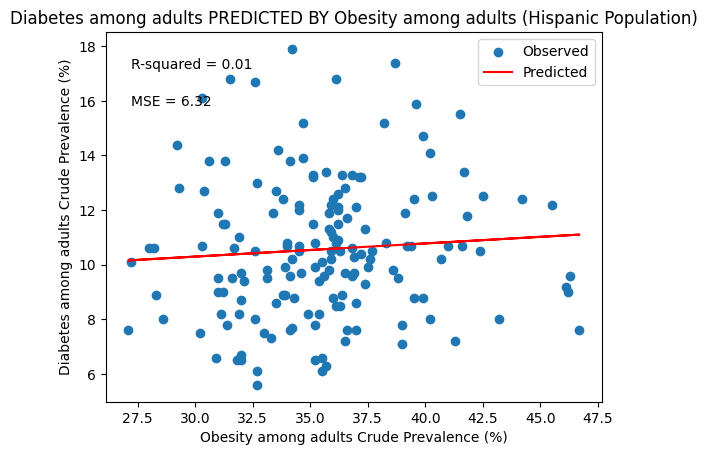

In [11]:
df_hispanic = pd.read_csv(r'C:\Users\MadiL\CS110 CodeBase\Demographics\hispanic_crude_prevalence_df.csv')

x_question = 'Obesity among adults'
y_question = 'Diabetes among adults'


x_df_hispanic = df_hispanic[(df_hispanic['Question'] == f'{x_question}')] 
y_df_hispanic = df_hispanic[(df_hispanic['Question'] == f'{y_question}')]

# Merge on 'LocationDesc'
merged_df_hispanic = pd.merge(
    x_df_hispanic[['LocationDesc', 'YearStart', 'YearEnd', 'DataValue']],
    y_df_hispanic[['LocationDesc', 'YearStart', 'YearEnd', 'DataValue']],
    on=['LocationDesc', 'YearStart', 'YearEnd'],
    suffixes=('_x', '_y')
)
merged_df_hispanic = merged_df_hispanic.dropna(subset=['DataValue_x', 'DataValue_y'])


X_hispanic = merged_df_hispanic[['DataValue_x']]
y_hispanic = merged_df_hispanic['DataValue_y']


# Standardize the data
#X_hispanic = (X_hispanic - X_hispanic.mean()) / X_hispanic.std()
#y_hispanic = (y_hispanic - y_hispanic.mean()) / y_hispanic.std()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_hispanic, y_hispanic, test_size=0.2, random_state=42)

# Train a model
model = LinearRegression()
model.fit(X_hispanic, y_hispanic)

# Make predictions
predictions = model.predict(X_hispanic)

# Plot the predictions
plt.scatter(X_hispanic, y_hispanic, label='Observed')
plt.plot(X_hispanic, predictions, label='Predicted', color='red')
plt.xlabel(f'{x_question} Crude Prevalence (%)')
plt.ylabel(f'{y_question} Crude Prevalence (%)')
plt.title(f'{y_question} PREDICTED BY {x_question} (Hispanic Population)')
plt.legend()


# Evaluate the model
mse_hispanic = mean_squared_error(y_hispanic, predictions)
plt.text(0.05, 0.8, f'MSE = {mse_hispanic:.2f}', transform=plt.gca().transAxes)
r2_hispanic = r2_score(y_hispanic, predictions)
plt.text(0.05, 0.9, f'R-squared = {r2_hispanic:.2f}', transform=plt.gca().transAxes)
plt.show()

# Summary

In [23]:
# Show R-squared value for each model along with sample size
print(f"R-squared value for Black population: {r2_black:.2f}")
print(f"Sample size for Black population: {len(X_black)}")
print()

print(f"R-squared value for Hispanic population: {r2_hispanic: .2f}")
print(f"Sample size for Hispanic population: {len(X_hispanic)}")
print()

print(f"R-squared value for Native American population: {r2_native: .2f}")
print(f"Sample size for Native American population: {len(X_native)}")
print()

print(f"R-squared value for White population: {r2_white: .2f}")
print(f"Sample size for White population: {len(X_white)}")

print()
print()

# Create a DataFrame to store the R-squared values and sample sizes for each population
results = pd.DataFrame({
    "Population": ["Black", "Hispanic", "Native American", "White"],
    "R-squared": [r2_black, r2_hispanic, r2_native, r2_white],
    "Sample Size": [len(X_black), len(X_hispanic), len(X_native), len(X_white)]
})

# Display the results as a table
print(results)



R-squared value for Black population: 0.27
Sample size for Black population: 157

R-squared value for Hispanic population:  0.01
Sample size for Hispanic population: 161

R-squared value for Native American population:  0.14
Sample size for Native American population: 70

R-squared value for White population:  0.64
Sample size for White population: 206


        Population  R-squared  Sample Size
0            Black   0.266890          157
1         Hispanic   0.005409          161
2  Native American   0.136643           70
3            White   0.643259          206
